In [59]:
# Import modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<Axes: >

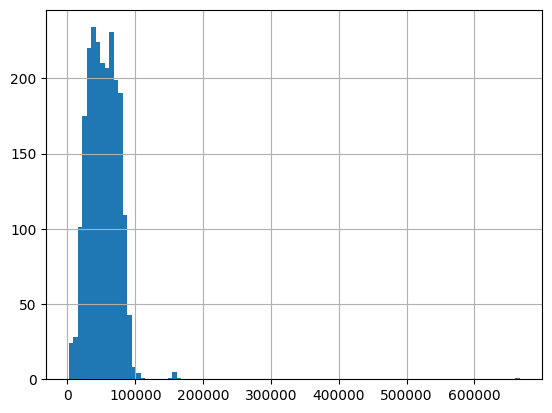

In [60]:
# EDA
cust = pd.read_csv('customer_segmentation.csv')
# cust.head()
cust.info() # Income missing 24 values
cust['Income'].hist(bins=100)

In [61]:
# Fill in missing values
cust_income_med = cust['Income'].median()
cust['Income'].fillna(cust_income_med, inplace=True)
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

C:\Users\User\AppData\Local\Temp\ipykernel_11800\3365302513.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust['Income'].fillna(cust_income_med, inplace=True)


In [62]:
# Visualize Income
# cust['Income'].hist(bins=100)
cust['Income_bins'] = pd.cut(cust['Income'], bins = [0, 50000, 150000, 1000000], labels=['Low', 'Medium', 'High'])
cust['Income_bins'].value_counts()

Income_bins
Medium    1172
Low       1060
High         8
Name: count, dtype: int64

<Axes: >

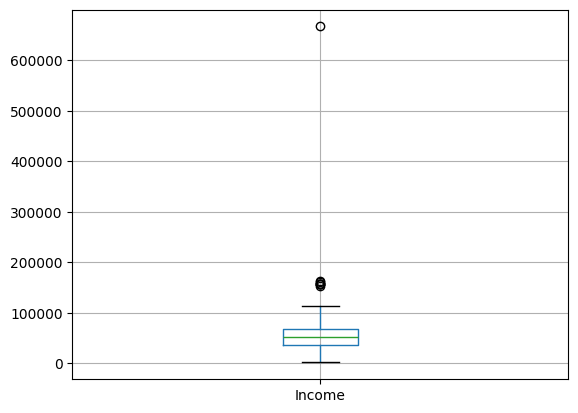

In [63]:
# Visualize Income Boxplot
# cust['Income'].hist(bins=100)
cust.boxplot(column='Income')

C:\Users\User\AppData\Local\Temp\ipykernel_11800\2296236562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_new['Income_bins'] = pd.cut(cust_new['Income'], bins = [0, 50000, 150000, 1000000], labels=['Low', 'Medium', 'High'])


Income_bins
Medium    1172
Low       1060
High         0
Name: count, dtype: int64

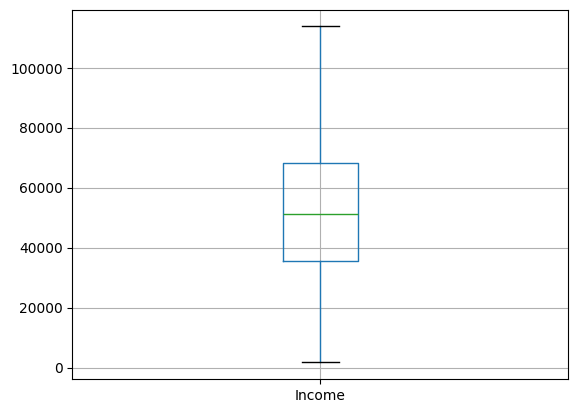

In [64]:
# Remove outliers
cust_new = cust[cust['Income'] < 150000]
cust_new.boxplot(column='Income')
cust_new['Income_bins'] = pd.cut(cust_new['Income'], bins = [0, 50000, 150000, 1000000], labels=['Low', 'Medium', 'High'])
cust_new['Income_bins'].value_counts()

In [65]:
# Obtain low income
cust_low = cust[cust['Income'] <= 50000]

MntWines             3.743977
MntFruits            5.119924
MntMeatProducts     16.028136
MntFishProducts      4.983528
MntSweetProducts     5.481540
MntGoldProds         3.981486
dtype: float64

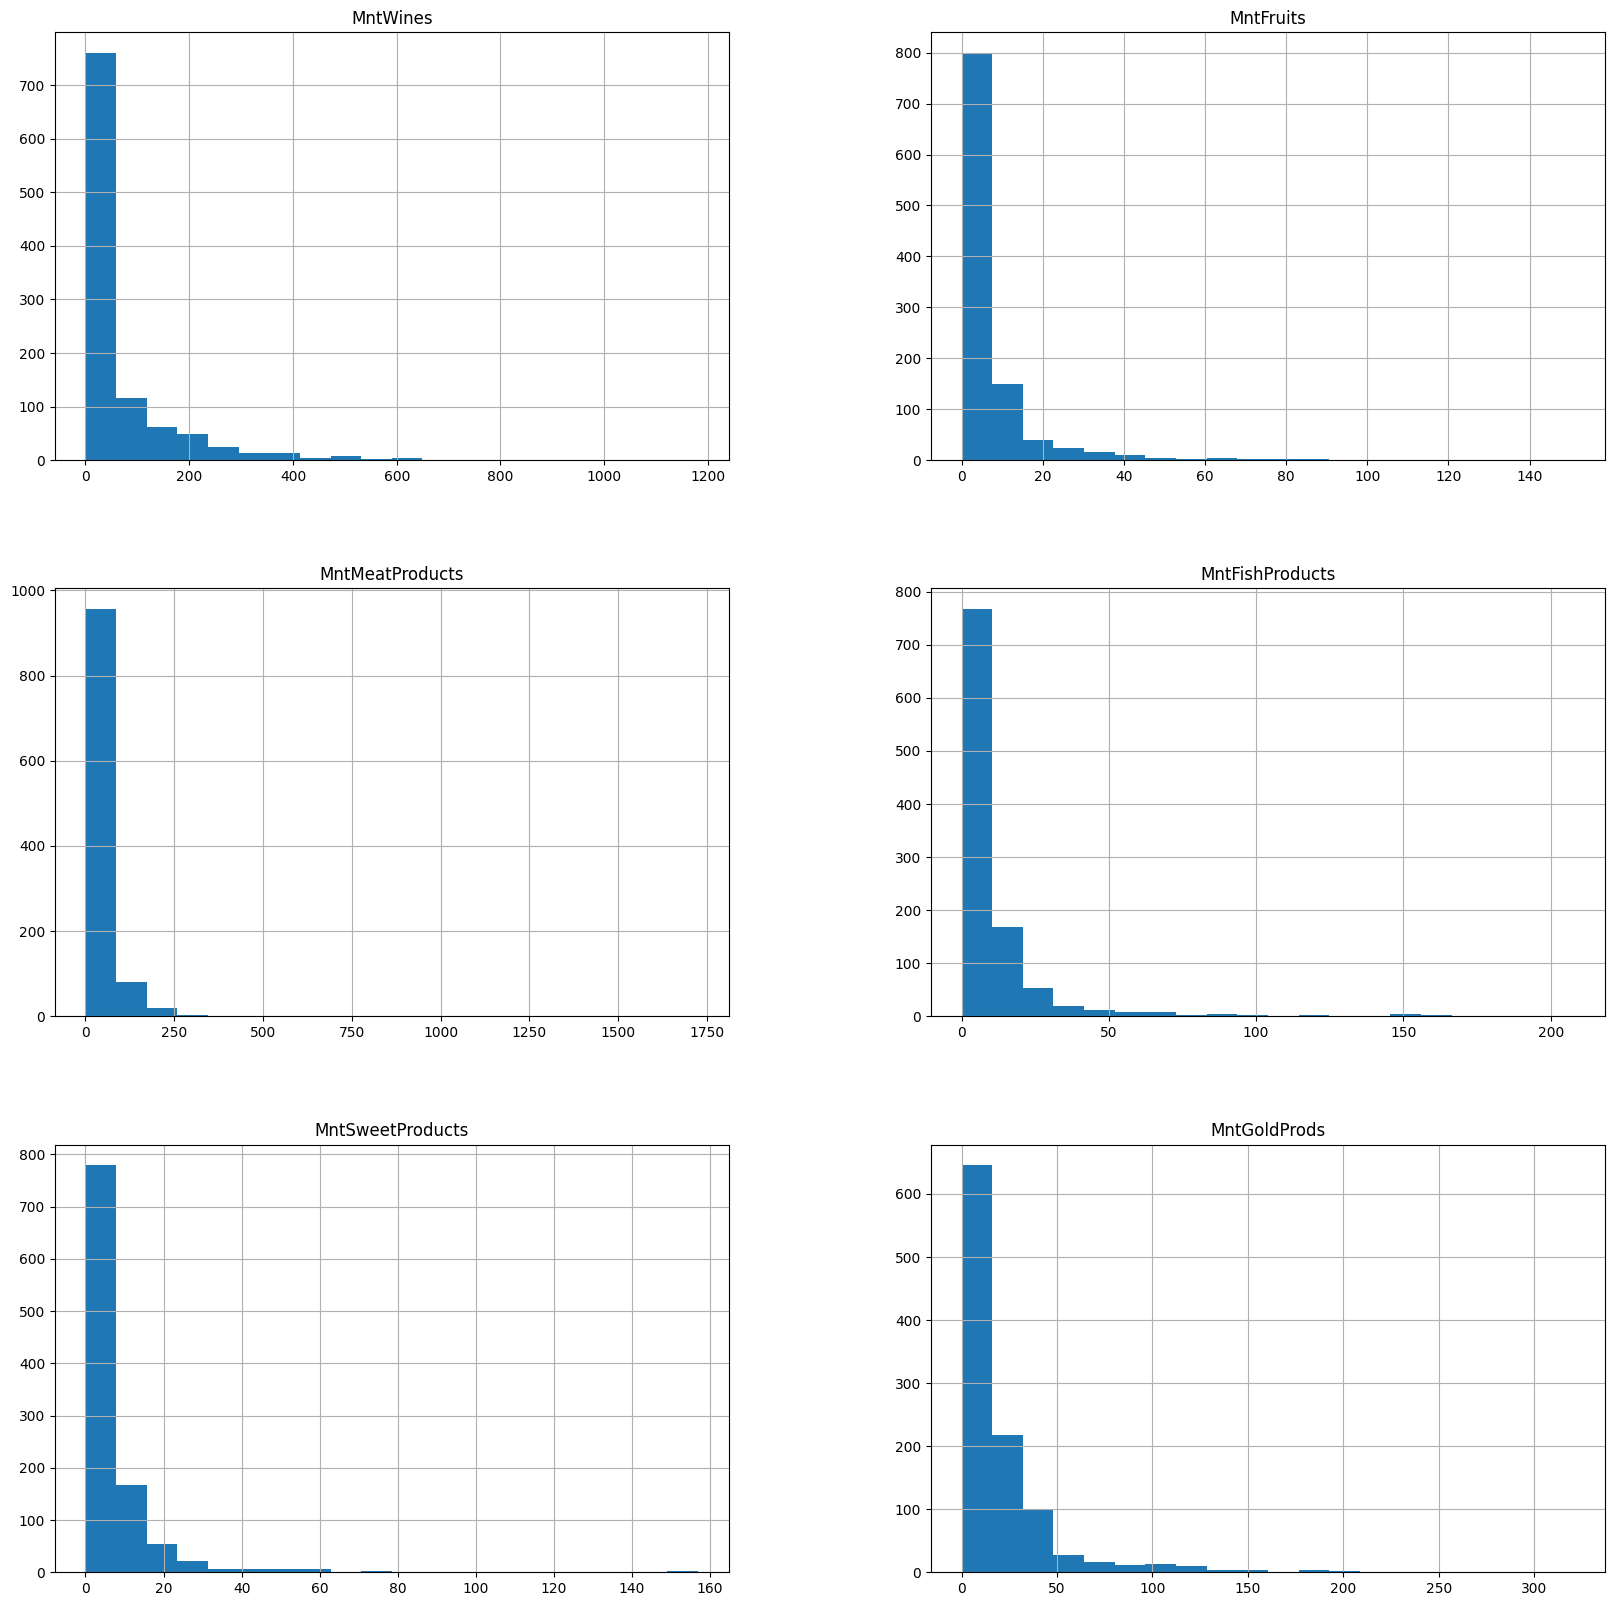

In [66]:
# More EDA
cust_chosen = cust_low[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
cust_chosen.hist(bins=20, figsize=(20,20))
cust_chosen.skew(numeric_only=True)

In [67]:
# Choose variables and check skew
cust_chosen = cust_low[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
cust_chosen.skew(numeric_only=True)

MntWines             3.743977
MntFruits            5.119924
MntMeatProducts     16.028136
MntFishProducts      4.983528
MntSweetProducts     5.481540
MntGoldProds         3.981486
dtype: float64

# 2. Transformation (Square-root)

In [68]:
# Transformation of skewed variables
cust_chosen['SQRT_MntWines'] = np.sqrt(cust_chosen['MntWines'])
cust_chosen['SQRT_MntFruits'] = np.sqrt(cust_chosen['MntFruits'])
cust_chosen['SQRT_MntMeatProducts'] = np.sqrt(cust_chosen['MntMeatProducts'])
cust_chosen['SQRT_MntFishProducts'] = np.sqrt(cust_chosen['MntFishProducts'])
cust_chosen['SQRT_MntSweetProducts'] = np.sqrt(cust_chosen['MntSweetProducts'])
cust_chosen['SQRT_MntGoldProds'] = np.sqrt(cust_chosen['MntGoldProds'])

cust_chosen.skew(numeric_only=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11800\1261219308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_chosen['SQRT_MntWines'] = np.sqrt(cust_chosen['MntWines'])
C:\Users\User\AppData\Local\Temp\ipykernel_11800\1261219308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_chosen['SQRT_MntFruits'] = np.sqrt(cust_chosen['MntFruits'])
C:\Users\User\AppData\Local\Temp\ipykernel_11800\1261219308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


MntWines                  3.743977
MntFruits                 5.119924
MntMeatProducts          16.028136
MntFishProducts           4.983528
MntSweetProducts          5.481540
MntGoldProds              3.981486
SQRT_MntWines             1.585712
SQRT_MntFruits            1.598135
SQRT_MntMeatProducts      2.582044
SQRT_MntFishProducts      1.757842
SQRT_MntSweetProducts     1.589549
SQRT_MntGoldProds         1.481515
dtype: float64

In [69]:
%matplotlib inline

<Axes: xlabel='SQRT_MntWines', ylabel='Count'>

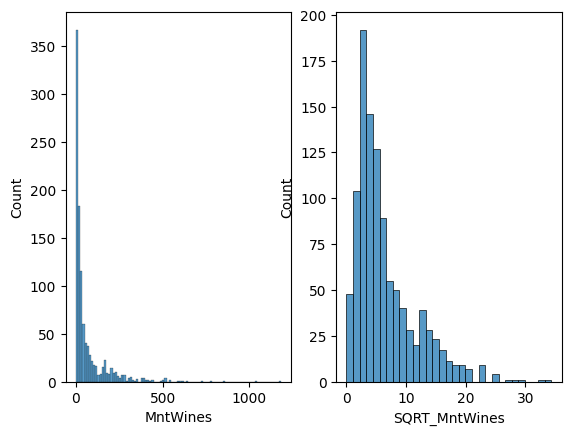

In [70]:
# Check Transformed values
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_chosen['MntWines'], kde = False, ax = ax[0])
sns.histplot(cust_chosen['SQRT_MntWines'], kde = False, ax = ax[1])

In [71]:
# Drop non-transformed values
cust_new = cust_chosen.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis = 1)
cust_new.head()

,SQRT_MntWines,SQRT_MntFruits,SQRT_MntMeatProducts,SQRT_MntFishProducts,SQRT_MntSweetProducts,SQRT_MntGoldProds
1,3.316625,1.000000,2.449490,1.414214,1.000000,2.449490
3,3.316625,2.000000,4.472136,3.162278,1.732051,2.236068
7,8.717798,3.162278,7.483315,1.732051,1.000000,4.795832
8,3.741657,0.000000,4.898979,1.732051,1.732051,1.414214
9,5.291503,0.000000,2.449490,1.000000,1.000000,3.605551


# 3. Standardization

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
# scales data as z = (x - u) / s using Z-score

# create a StandardScaler object
scaler = StandardScaler()

# fit a scaler using the cust_new data by calling the fit() function 
scaler.fit(cust_new)

StandardScaler()

In [74]:
# Standardize values and reformat
cust_new_scaled_np = scaler.transform(cust_new)
# type(cust_new_scaled_np)
cust_prepared = pd.DataFrame(cust_new_scaled_np, columns= [['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
cust_prepared.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,-0.609700,-0.524743,-0.793889,-0.450429,-0.525751,-0.570912
1,-0.609700,0.040626,-0.147586,0.334720,-0.118034,-0.655111
2,0.445441,0.697743,0.814586,-0.307672,-0.525751,0.354759
3,-0.526668,-1.090112,-0.011195,-0.307672,-0.118034,-0.979346
4,-0.223900,-1.090112,-0.793889,-0.636475,-0.525751,-0.114827


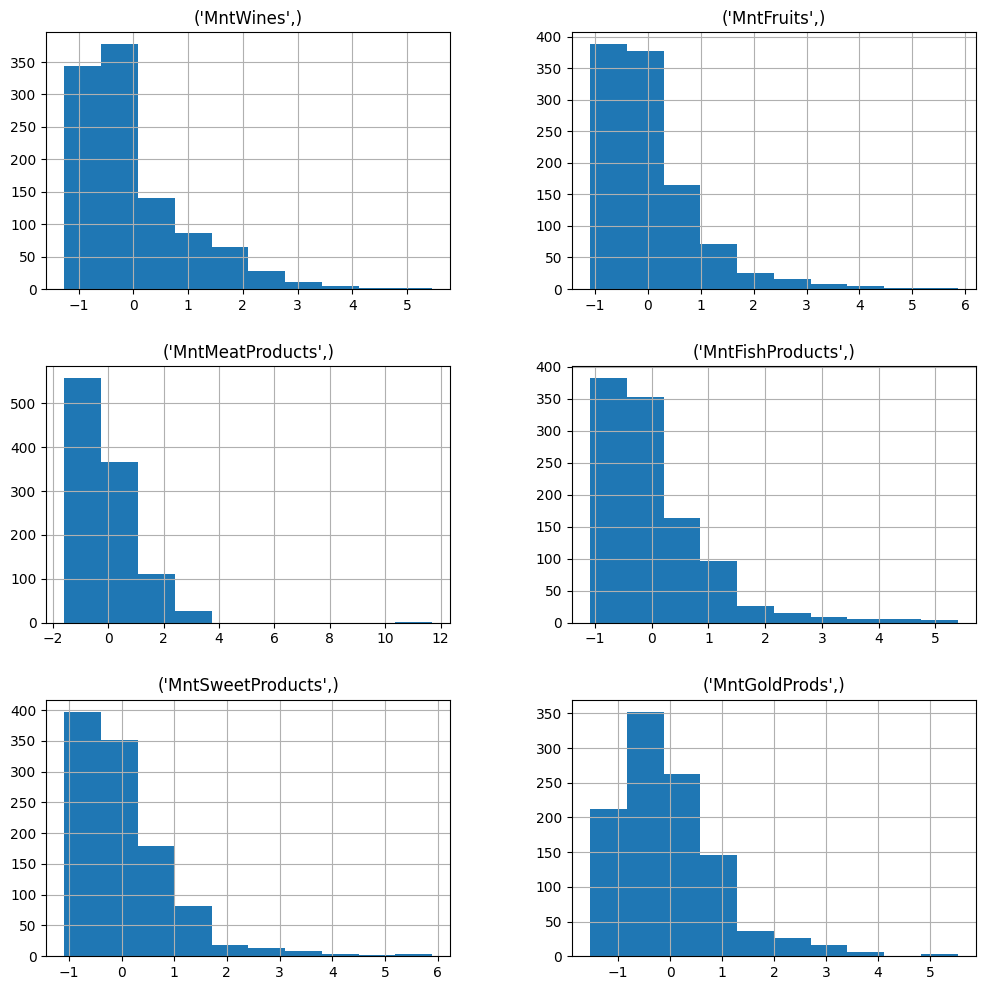

In [75]:
cust_prepared.hist(figsize= (12,12))
plt.show()

# 4. Modelling

In [76]:
from sklearn.cluster import KMeans

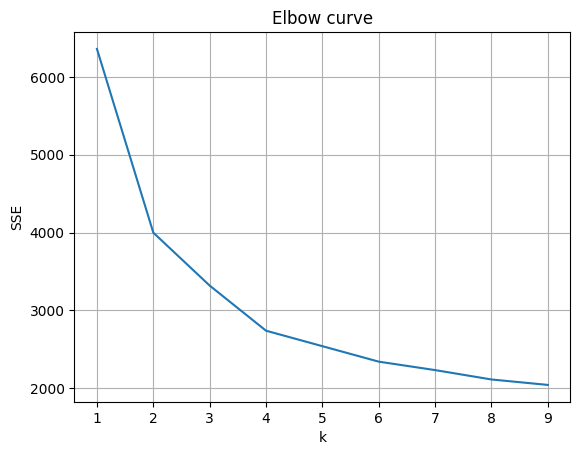

In [77]:
SSE = []
# Run K-means algorithm from K=1 to 9
for i in range(1,10):
    model_i = KMeans(init='k-means++', n_clusters = i, random_state=99)
    model_i.fit(cust_prepared)
    SSE.append(model_i.inertia_)
k = (range(1,10))
plt.plot(k, SSE)

plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

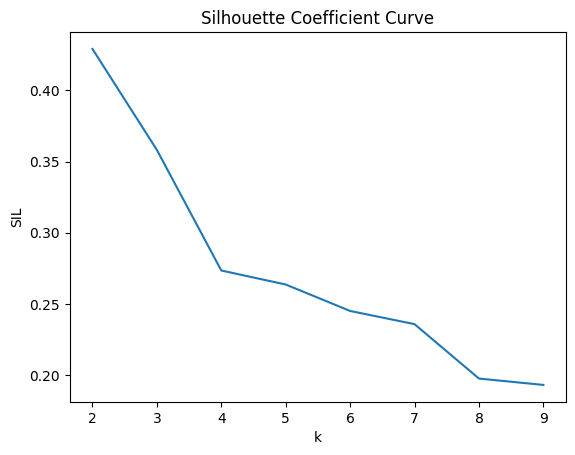

In [78]:
from sklearn.metrics import silhouette_score

# run KMeans for k = 1 to k = 9
sil = []
for i in range(2,10):
    clusterer = KMeans(n_clusters= i, random_state=0)
    preds = clusterer.fit(cust_prepared)
    sil.append(silhouette_score(cust_prepared, preds.labels_))

# Plotting the graph with Silhouette Coefficients
k = (range(2,10))
plt.title('Silhouette Coefficient Curve')
plt.xlabel('k')
plt.ylabel('SIL')
plt.plot(k, sil)

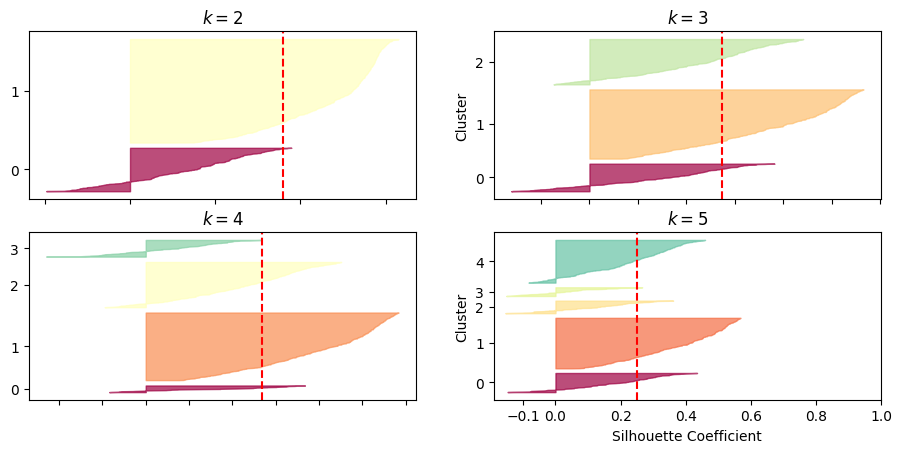

In [79]:
# Silhouette diagram. Credits to MOHAMED MEQLAD
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=99).fit(cust_prepared) for k in range(2, 10)]

silhouette_scores = [silhouette_score(cust_prepared, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(11, 10))

for k in (2, 3, 4, 5):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(cust_prepared, y_pred)

    padding = len(cust_prepared) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4348189827325649
For n_clusters = 3 The average silhouette_score is : 0.36835754165696094
For n_clusters = 4 The average silhouette_score is : 0.2777232115504501
For n_clusters = 5 The average silhouette_score is : 0.2467338612371868


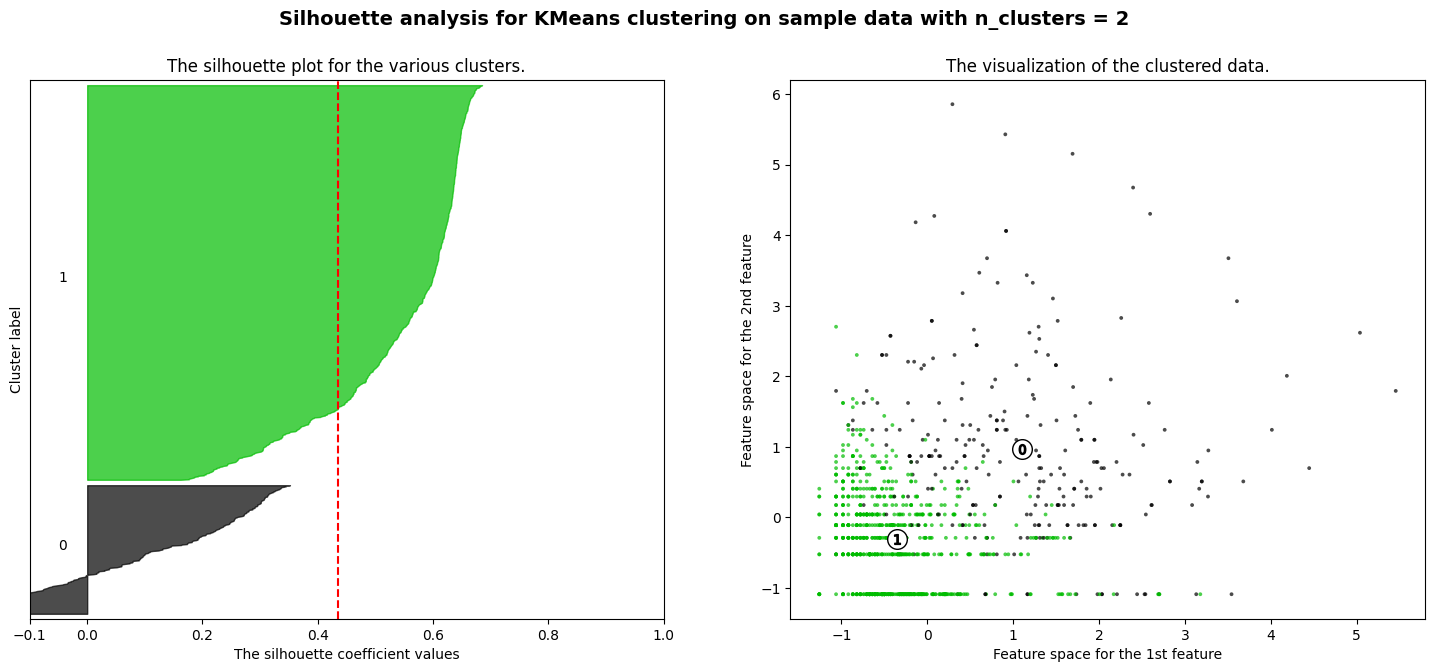

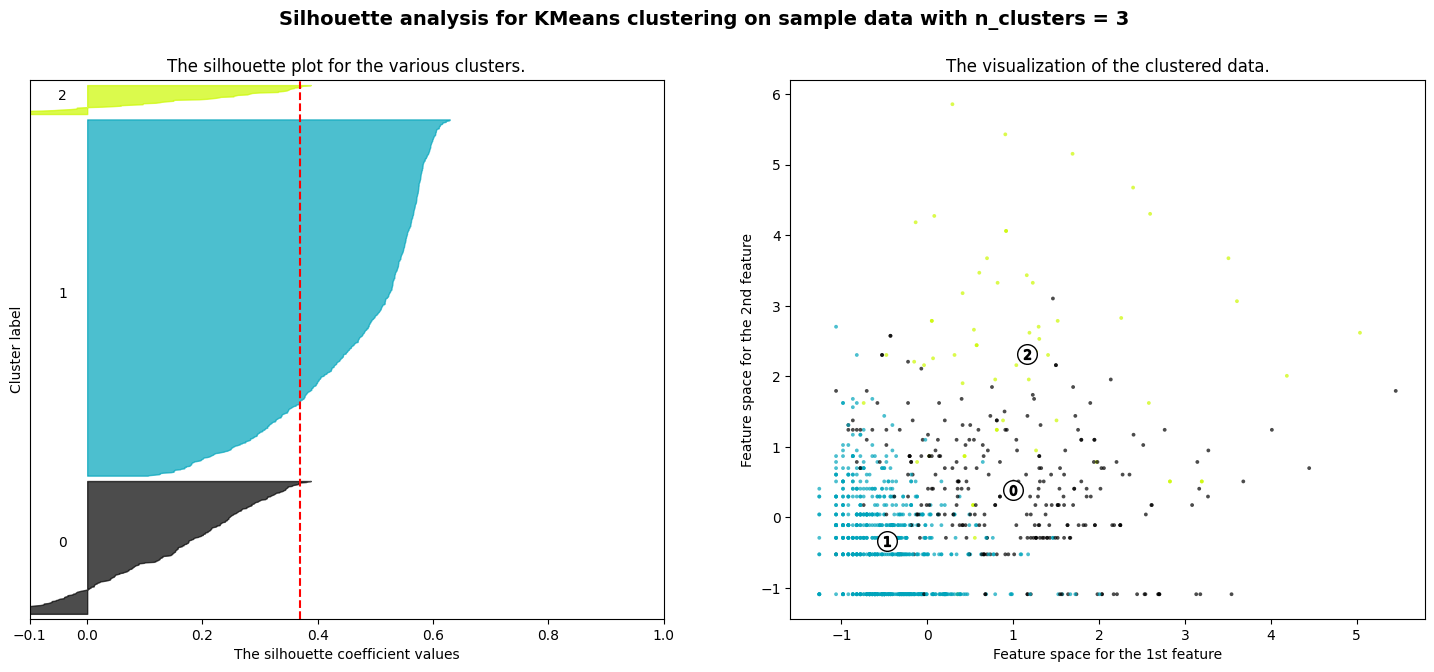

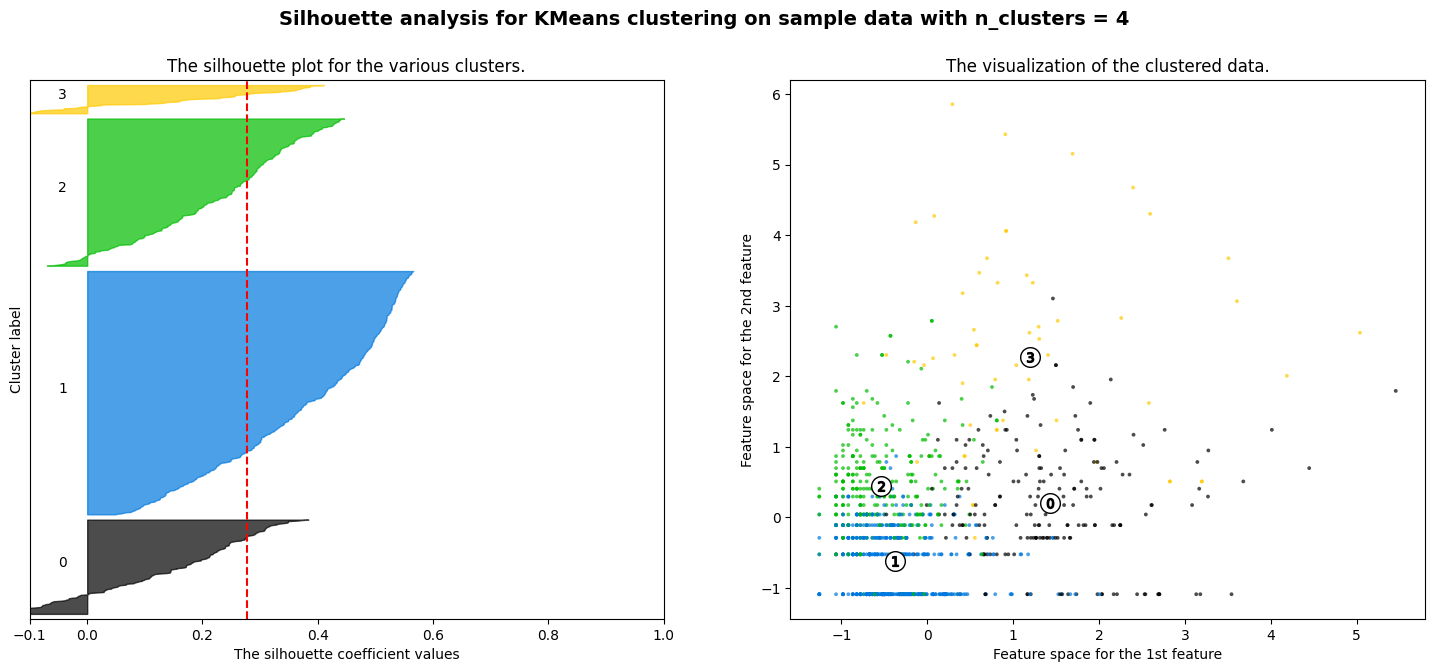

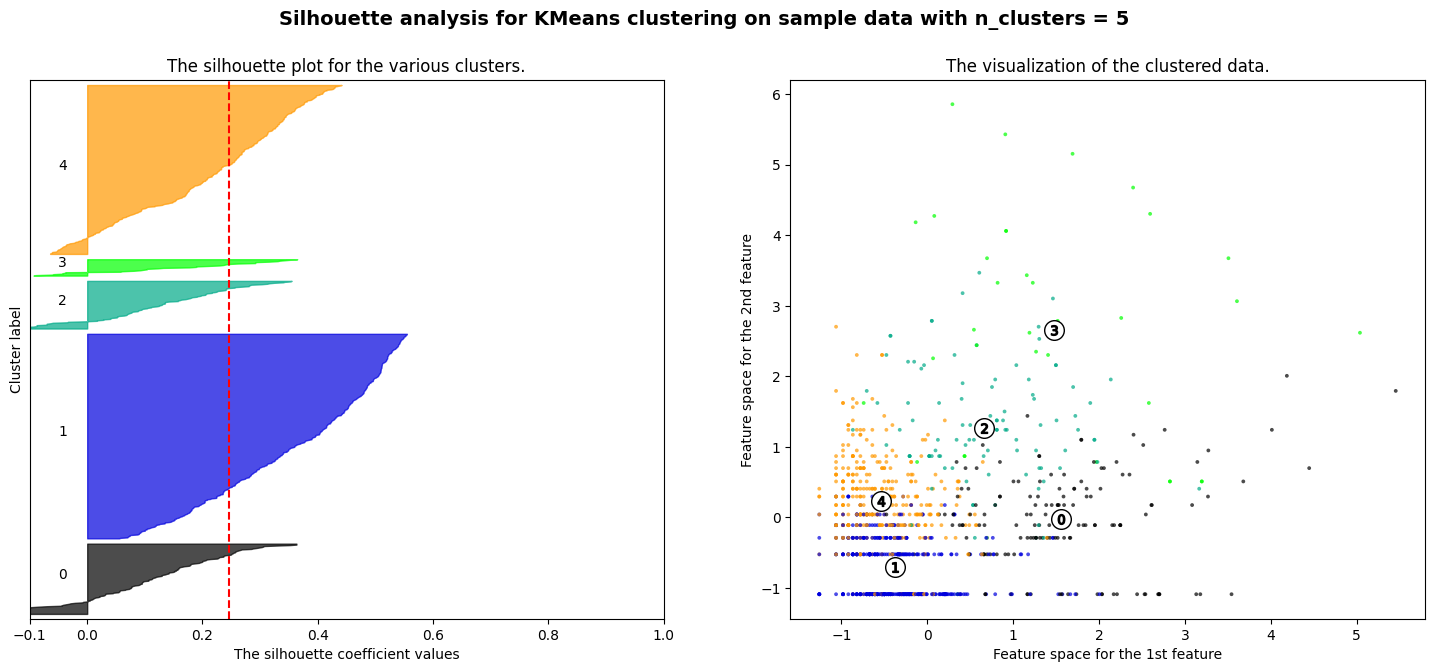

In [80]:
# Reference to https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cust_prepared) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 99 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=99)
    cluster_labels = clusterer.fit_predict(cust_prepared)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cust_prepared, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cust_prepared, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        cust_prepared.iloc[:, 0], cust_prepared.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [81]:
# Using K = 5,
model_5 = KMeans(n_clusters = 5, random_state=99)
model_5.fit(cust_prepared)

KMeans(n_clusters=5, random_state=99)

In [89]:
print("Attributes of the clustering solution for k=5:")
print("SSE :", round(model_5.inertia_, 1))
print("Num of iterations :" , model_5.n_iter_)

Attributes of the clustering solution for k=5:
SSE : 2538.5
Num of iterations : 20


In [88]:
# Check improvement
between_ss = SSE[0] - model_5.inertia_
improvement = (between_ss / SSE[0]) * 100
print('The improvement of SSE due to cluster (k=5) is: ' + str(round(improvement, 2)) + '%')

The improvement of SSE due to cluster (k=5) is: 60.09%


In [84]:
# Check improvement for other K values
between_ss = []
for i in range(1,10):
    between_ss.append(((SSE[0]-SSE[i-1]) / SSE[0]) * 100)
    
print(*between_ss, sep = "\n")

0.0
37.13795971177026
47.83674744719626
56.95732154154947
60.086178353662056
63.21334879707613
64.92006859296265
66.815152514258
67.91580207457078


In [85]:
cust_prepared['cluster'] = model_5.labels_
cust_prepared['cluster'].value_counts()

(cluster,)
1             426
4             352
0             147
2             100
3              35
Name: count, dtype: int64

In [86]:
# create a DataFrame of cluster centers. Note that row 0 corresponds to cluster label = 0

clust_means = pd.DataFrame(model_5.cluster_centers_, columns=[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])

<Axes: ylabel='None'>

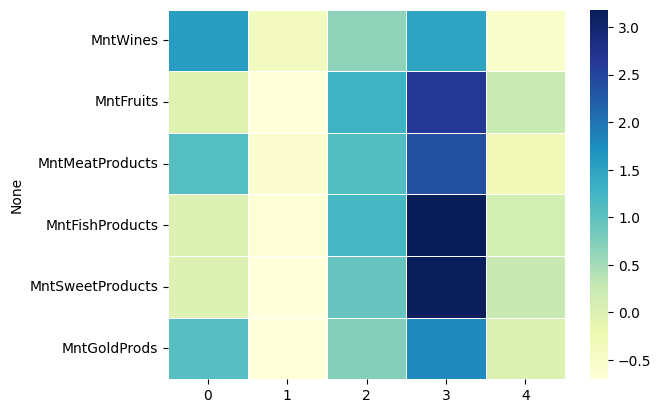

In [87]:
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

#### Cluster 0: Spend more on wines, meat, and gold
#### Cluster 1: Spend less across all product
#### Cluster 2: Spend above average across all products
#### Cluster 3: Spend much higher across all products, higher for fruits, fish, and sweets
#### Cluster 4: Spend less across all product, average for fruits, fish, and sweets
